In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [2]:
#Q1-Read the data https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv
df=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')

The description of dataset is given below.

•	ID: Uniquely identifies each observation (diamond)

•	Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip

•	Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)

•	Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)

•	Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)

•	Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

•	Price: The The amount in USD that the diamond is valued


In [3]:
#Q2-Get first 2 rows of data
df.head(2)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470


In [4]:
#Q3-Check if there is missing value
df.isnull().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [5]:
#Q4- Get data information and number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [6]:
#Q5-Get descriptive statistics of data
df.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


<Axes: >

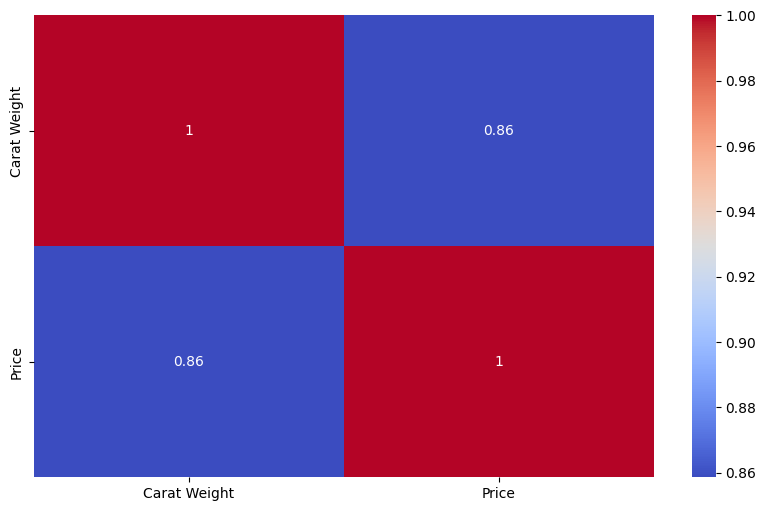

In [8]:
#Q6-Use seasoborns heat map to generate following heatmap
# annot = True to print the correlation inside the square
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

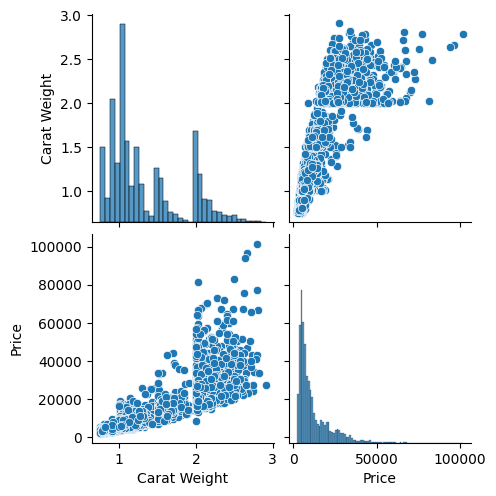

In [9]:
#Q7-Use seasoborns paiplot to generate following  diagram
sns.pairplot(df)

In [11]:
#Q8-Divide the data so that get Price as output variable (Y) and other variables as input variable (X)
y = df['Price']
X = df.drop('Price', axis=1)

In [13]:
#Q9-Create dummy for the input variables (X)
X = pd.get_dummies(X)


In [17]:
#Q10 -Split the input and output data into two parts: test data (20%) and train data(%80)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4800, 29)
(1200, 29)
(4800,)
(1200,)


In [18]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [19]:
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
evalmetric(y_test, y_pred)
y_pred_train = model.predict(x_train)
evalmetric(y_train, y_pred_train)

MSE: 16442855.461666666
RMSE: 4054.9790950961346
MAE: 2383.3133333333335
MAPE: 27.879351345676874
R-Squared: 0.8457078427530665
MSE: 13636189.835416667
RMSE: 3692.721196545532
MAE: 2411.247083333333
MAPE: 28.280030998282417
R-Squared: 0.8675767939508988


Q12 -Based on the performance of test and training model, can we say there is overfitting or not in the performace of liner model?

In [20]:
#Q13- Use Lasso regression to evaluate the performance of test and train data   using evalmetric
model = Lasso()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
evalmetric(y_test, y_pred)
y_pred_train = model.predict(x_train)
evalmetric(y_train, y_pred_train)


MSE: 16397475.871233936
RMSE: 4049.3796896850677
MAE: 2384.4216196306184
MAPE: 27.923271021548473
R-Squared: 0.8461336638593319
MSE: 13620186.418222291
RMSE: 3690.553673667718
MAE: 2418.6060989645284
MAPE: 28.386182997127907
R-Squared: 0.8677322056779423


In [21]:
#Q14 Use Ridge regreesionto evaluate the performance of test and train data   using 
model = Ridge()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
evalmetric(y_test, y_pred)
y_pred_train = model.predict(x_train)
evalmetric(y_train, y_pred_train)

MSE: 16386346.263920397
RMSE: 4048.0052203425325
MAE: 2389.45222000256
MAPE: 28.022200369524843
R-Squared: 0.8462380989512615
MSE: 13646548.843169987
RMSE: 3694.123555482408
MAE: 2422.9559862611773
MAPE: 28.470060203328483
R-Squared: 0.8674761959807372


Q15- Did you get any improvement on test data using Ridge and Lasso?
Explain why?

In [22]:
#Q16-Use Decison Tree Regression to evaluate the performance of test and train data   using evalmetric
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
evalmetric(y_test, y_pred)
y_pred_train = model.predict(x_train)
evalmetric(y_train, y_pred_train)

MSE: 4329587.425307846
RMSE: 2080.766066934927
MAE: 887.9130773809525
MAPE: 7.067351098403776
R-Squared: 0.9593731523458741
MSE: 83753.97633482143
RMSE: 289.40279254841585
MAE: 77.53468948412699
MAPE: 0.7629440866398477
R-Squared: 0.999186651828738


In [23]:
#Q17-Use Random Forest to evaluate the performance of test and train data   using evalmetric
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
evalmetric(y_test, y_pred)
y_pred_train = model.predict(x_train)
evalmetric(y_train, y_pred_train)

MSE: 1336124.3647458681
RMSE: 1155.9084586358333
MAE: 638.0570167533856
MAPE: 5.396695861709515
R-Squared: 0.9874624263974444
MSE: 418342.6856790294
RMSE: 646.7941602078897
MAE: 306.32937153046316
MAPE: 2.4540611536270527
R-Squared: 0.9959374077118723


Q18-Why Random forest perform better than Decison Tree on test data?

Random Forest performs better than a Decision Tree on test data because it reduces overfitting by averaging predictions from multiple trees, making it more robust. It uses bagging (bootstrap aggregation) to train trees on different random subsets of data, improving generalization. Feature randomization at each split prevents reliance on dominant features, leading to better performance in high-dimensional data. By averaging multiple trees' predictions, it reduces variance and is less sensitive to noise and outliers. These advantages make Random Forest a more stable and accurate model than a single Decision Tree.

Q19- Which regression technique among Linear Regresssion, Lasso Regression ,Ridge Regression, Decision Tree and Random Forest  provide best performance on test data?


The best regression technique for test data depends on the nature of the dataset, but generally, **Random Forest Regression** tends to provide the best performance in most real-world scenarios.  

- **Linear Regression** performs well when the data has a linear relationship, but it struggles with complex patterns.  
- **Lasso Regression** (L1 regularization) helps with feature selection by shrinking some coefficients to zero, making it useful for sparse data.  
- **Ridge Regression** (L2 regularization) reduces overfitting in high-dimensional datasets but still assumes a linear relationship.  
- **Decision Tree Regression** captures non-linearity but often overfits, leading to poor generalization on test data.  
- **Random Forest Regression**, an ensemble of Decision Trees, reduces overfitting through bagging and averaging, making it more robust and accurate on unseen data.  

Thus, **Random Forest Regression** typically provides the best performance on test data, especially when dealing with non-linear relationships and complex patterns. 